<a href="https://colab.research.google.com/github/milkywayweaver/learn_pytorch/blob/main/projects/PyT_P003_MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Digit Classification** <br>
<br>
💡 This project aims to train a model to "read" digits from images. This project is done when I have not learned CNNs yet, therefore the model only uses linear and ReLU layers (I will probably update this project sometime later though). <br>
<br>
📖 Link to the course I follow:

* PyTorch for Deep Learning & Machine Learning - freeCodeCamp.org, taught by Daniel Bourke.
https://youtu.be/V_xro1bcAuA?si=luBE0ln8qKDfQWyM

In [14]:
!pip install idx2numpy > /dev/null

In [15]:
import torch
from torch import nn
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

✅ Make the code device agnostic

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

✅ Define plot loss curve function

In [17]:
def plot_loss_curve(traintest=0):
  if traintest == 0:
    loss,acc = losses,accs
  else:
    loss,acc = test_losses,test_accs
  fig,ax = plt.subplots(figsize=(4,4))
  ax1 = ax.twinx()
  ax.plot(epoch_counts,loss,label='Loss',color='C1')
  ax1.plot(epoch_counts,acc,label='Accuracy',color='C2')
  ax.set_xlabel('Epochs')
  ax1.set_xlabel('Epochs')
  ax.set_ylabel('Loss',color='C1')
  ax1.set_ylabel('Accuracy',color='C2')
  ax.set_ylim(0,1)
  ax1.set_ylim(0,100)
  plt.title('Loss Curve')
  plt.show()

✅ Read the data

In [18]:
import idx2numpy
MNIST(root='./data',download=True)

X_train = idx2numpy.convert_from_file('/content/data/MNIST/raw/train-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file('/content/data/MNIST/raw/train-labels-idx1-ubyte')
X_test = idx2numpy.convert_from_file('/content/data/MNIST/raw/t10k-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('/content/data/MNIST/raw/t10k-labels-idx1-ubyte')

X_train = torch.tensor(X_train,device=device,dtype=torch.float32).reshape(60000,28*28)
y_train = torch.tensor(y_train,device=device,dtype=torch.float32)
X_test = torch.tensor(X_test,device=device,dtype=torch.float32).reshape(10000,28*28)
y_test = torch.tensor(y_test,device=device,dtype=torch.float32)

# X_train = X_train[:32]
# y_train = y_train[:32]
# X_test = X_test[:32]
# y_test = y_test[:32]

print(f'Train data shape: {X_train.shape}')
print(f'Train label shape: {y_train.shape}')

Train data shape: torch.Size([60000, 784])
Train label shape: torch.Size([60000])


✅ Build the model

In [19]:
class DigitClassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.stacked_layer = nn.Sequential(
        nn.Linear(in_features=28*28,out_features=256,device=device),
        nn.ReLU(),
        nn.Linear(in_features=256,out_features=128,device=device),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=256,device=device),
        nn.ReLU(),
        nn.Linear(in_features=256,out_features=10,device=device)
    )

  def forward(self,x):
    return self.stacked_layer(x)

✅ Build the training loop

In [20]:
def accuracy(y_preds,y_test):
  acc = torch.eq(y_preds.argmax(1),y_test).sum().item()
  return acc/len(y_preds.argmax(1))*100

def train(model,epochs,lr):
  # Setup empty arrays
  epoch_counts = []
  losses = []
  test_losses = []
  accs = []
  test_accs = []

  # Setup loss function and optimizer
  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(params=model.parameters(),lr=lr)

  for epoch in range(epochs):
    # Train
    model.train()
    y_logits = model(X_train)
    y_preds = torch.softmax(y_logits,1)
    loss = loss_fn(y_logits,y_train.type(torch.long))
    acc = accuracy(y_preds,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluate
    model.eval()
    with torch.inference_mode():
      test_logits = model(X_test)
      test_preds = torch.softmax(test_logits,1)
      test_loss = loss_fn(test_logits,y_test.type(torch.long))
      test_acc = accuracy(test_preds,y_test)

    if epoch % int(epochs/10) == 0:
      print(f'Epoch: {epoch}\t| Training: {loss:.2f} - {acc:.2f}\t| Tetsing: {test_loss:.2f} - {test_acc:.2f}')

    epoch_counts.append(epoch)
    losses.append(loss.cpu().detach().item())
    test_losses.append(test_loss.cpu().detach().item())
    accs.append(acc)
    test_accs.append(test_acc)

  return epoch_counts,losses,test_losses,accs,test_accs

✅ Train the model

In [21]:
model = DigitClassification()
epoch_counts,losses,test_losses,accs,test_accs = train(model,500,0.0005)

Epoch: 0	| Training: 4.54 - 11.15	| Tetsing: 3.00 - 24.50
Epoch: 50	| Training: 0.15 - 95.48	| Tetsing: 0.17 - 94.76
Epoch: 100	| Training: 0.07 - 98.11	| Tetsing: 0.12 - 96.39
Epoch: 150	| Training: 0.03 - 99.24	| Tetsing: 0.10 - 96.92
Epoch: 200	| Training: 0.01 - 99.77	| Tetsing: 0.11 - 97.13
Epoch: 250	| Training: 0.01 - 99.95	| Tetsing: 0.11 - 97.29
Epoch: 300	| Training: 0.00 - 99.98	| Tetsing: 0.12 - 97.27
Epoch: 350	| Training: 0.00 - 100.00	| Tetsing: 0.13 - 97.24
Epoch: 400	| Training: 0.00 - 100.00	| Tetsing: 0.13 - 97.28
Epoch: 450	| Training: 0.00 - 100.00	| Tetsing: 0.14 - 97.28


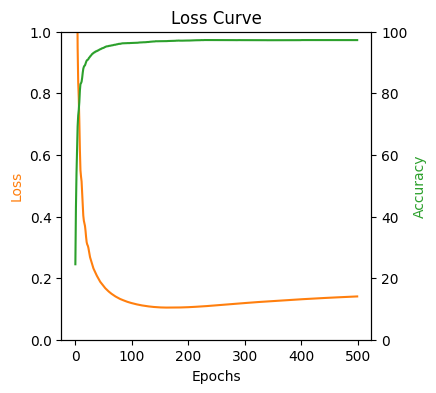

In [22]:
plot_loss_curve(1)

✅ Evaluate the model

Test No: 7160
Result: 5
Actual Label: 5


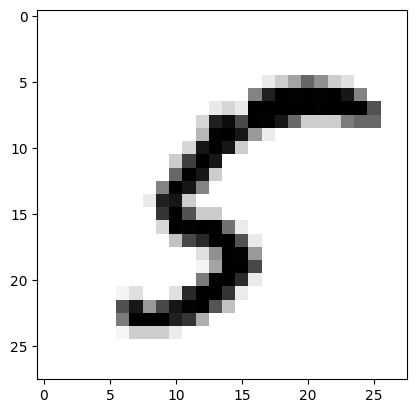

In [23]:
model.eval()
with torch.inference_mode():
  y_preds = torch.softmax(model(X_test),1).argmax(1)

n = np.random.randint(0,10000,1)
plt.imshow(X_test[n].reshape((28,28)).cpu(),cmap='binary')
print(f'Test No: {n[0]}')
print(f'Result: {y_preds[n].detach().item()}')
print(f'Actual Label: {int(y_test[n].detach().item())}')